In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from PIL import Image
from os import path
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [3]:
IMAGE_FOLDER = "./images"
INPUT_SIZE = 299
KERAS_MODEL_FILE_NAME = 'kitchenware_image_classiffication.h5'

In [4]:
# load the model
model = load_model(KERAS_MODEL_FILE_NAME)
model.summary()

2022-12-22 19:06:23.960235: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 19:06:23.962230: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 250)               512250    
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_5 (Dense)             (None, 6)                 1506      
                                                                 
Total params: 22,316,540
Trainable params: 513,756
Non-trainable params: 21,802,784
____________________________________

In [5]:
# read the test data
df_test = pd.read_csv('test.csv')
df_test.columns = df_test.columns.str.lower()
df_test['file_name'] = df_test['id'].map('{:04}.jpg'.format)
print(df_test.shape)
df_test.head()

(3808, 2)


,id,file_name
0,678,0678.jpg
1,3962,3962.jpg
2,9271,9271.jpg
3,5133,5133.jpg
4,8842,8842.jpg


In [6]:
# make predictions
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_dataframe(df_test.iloc[:8], 
                                         directory=IMAGE_FOLDER, 
                                         x_col='file_name',  
                                         target_size=(INPUT_SIZE, INPUT_SIZE),
                                         class_mode='input',
                                         shuffle=False,
                                         batch_size=32)

y_pred = model.predict(test_ds)

classes = np.array(['cup', 'fork', 'glass', 'knife', 'plate', 'spoon'])
predictions = classes[y_pred.argmax(axis=1)]

Found 8 validated image filenames.


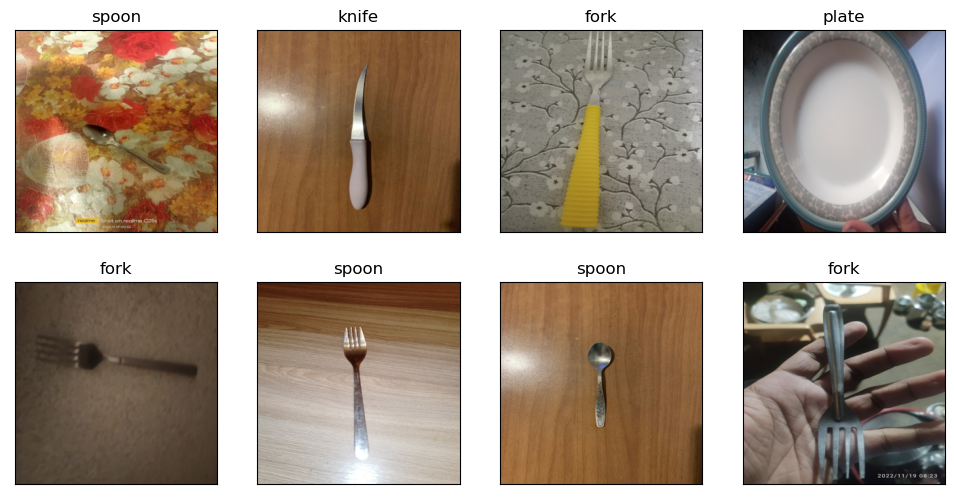

In [7]:
# show results
fig, axes = plt.subplots(2,4,figsize=(12,6))
for i, ax in enumerate(axes.reshape(-1)):
    row = df_test.iloc[i] 
    image_file = path.join(IMAGE_FOLDER, row['file_name'])
    image = Image.open(image_file).resize((INPUT_SIZE,INPUT_SIZE))
    ax.imshow(image)
    ax.set_title(predictions[i])
    ax.set_xticks([])
    ax.set_yticks([])